<a href="https://colab.research.google.com/github/aditya161205/DAV/blob/main/q1_DAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("student_data.csv")
data.head(100)

,Student_ID,Age,Gender,StudyHoursPerDay,SocialMediaHours,MovieTvShowHours,PoR,AttendancePercentage,SleepHoursPerNight,Diet_Quality,Exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,Cumulative_Grade
0,S1000,23.0,Female,0.0,NaN,1.1,No,NaN,NaN,Fair,NaN,Master,NaN,5.0,Yes,56.2
1,S1001,20.0,Female,6.9,2.8,2.3,No,97.3,4.6,Good,3.0,High School,Average,6.0,No,100.0
2,S1002,21.0,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,3.0,High School,Poor,6.0,No,34.3
3,S1003,NaN,Female,1.0,NaN,1.0,No,71.0,9.2,NaN,NaN,Master,Good,7.0,NaN,26.8
4,S1004,19.0,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3.0,Master,Good,5.0,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,S1095,22.0,Male,1.7,2.9,2.0,No,97.5,6.0,Good,2.0,High School,Good,4.0,No,50.2
96,S1096,18.0,Female,NaN,3.6,0.8,No,NaN,7.1,Good,4.0,NaN,NaN,NaN,No,87.9
97,S1097,20.0,Male,4.1,2.0,1.0,No,90.4,5.4,Good,3.0,Bachelor,Average,6.0,No,80.9
98,S1098,22.0,Male,2.4,0.0,3.1,No,92.2,4.8,Good,2.0,Bachelor,Good,4.0,Yes,63.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student_ID                     1000 non-null   object 
 1   Age                            951 non-null    float64
 2   Gender                         957 non-null    object 
 3   StudyHoursPerDay               957 non-null    float64
 4   SocialMediaHours               962 non-null    float64
 5   MovieTvShowHours               959 non-null    float64
 6   PoR                            953 non-null    object 
 7   AttendancePercentage           945 non-null    float64
 8   SleepHoursPerNight             960 non-null    float64
 9   Diet_Quality                   974 non-null    object 
 10  Exercise_frequency             954 non-null    float64
 11  parental_education_level       949 non-null    object 
 12  internet_quality               956 non-null    ob

Filling NaN

In [6]:
numeric = data.select_dtypes(include=['float64']).columns
for col in numeric:
    data[col] = data[col].fillna(data[col].median())


cat = data.select_dtypes(include=['object']).columns
for col in cat:
    data[col] = data[col].fillna(data[col].mode()[0])



In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Student_ID                     1000 non-null   object 
 1   Age                            1000 non-null   float64
 2   Gender                         1000 non-null   object 
 3   StudyHoursPerDay               1000 non-null   float64
 4   SocialMediaHours               1000 non-null   float64
 5   MovieTvShowHours               1000 non-null   float64
 6   PoR                            1000 non-null   object 
 7   AttendancePercentage           1000 non-null   float64
 8   SleepHoursPerNight             1000 non-null   float64
 9   Diet_Quality                   1000 non-null   object 
 10  Exercise_frequency             1000 non-null   float64
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

Identifying and managing outliers

In [8]:
for col in data.columns:
    if data[col].dtype == 'float64':
        lower = data[col].quantile(0.25)
        upper = data[col].quantile(0.75)
        data[col] = data[col].clip(lower, upper)
data.head(100)

,Student_ID,Age,Gender,StudyHoursPerDay,SocialMediaHours,MovieTvShowHours,PoR,AttendancePercentage,SleepHoursPerNight,Diet_Quality,Exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,Cumulative_Grade
0,S1000,22.0,Female,2.6,2.500,1.1,No,84.400,6.45,Fair,3.0,Master,Good,5.0,Yes,58.475
1,S1001,20.0,Female,4.5,2.800,2.3,No,90.400,5.60,Good,3.0,High School,Average,6.0,No,81.325
2,S1002,21.0,Male,2.6,3.100,1.3,No,90.400,7.20,Poor,3.0,High School,Poor,6.0,No,58.475
3,S1003,20.0,Female,2.6,2.500,1.0,No,78.375,7.20,Fair,3.0,Master,Good,7.0,No,58.475
4,S1004,19.0,Female,4.5,3.225,1.0,No,90.400,5.60,Fair,3.0,Master,Good,5.0,No,66.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,S1095,22.0,Male,2.6,2.900,2.0,No,90.400,6.00,Good,2.0,High School,Good,5.0,No,58.475
96,S1096,19.0,Female,3.5,3.225,1.0,No,84.400,7.10,Good,4.0,High School,Good,6.0,No,81.325
97,S1097,20.0,Male,4.1,2.000,1.0,No,90.400,5.60,Good,3.0,Bachelor,Average,6.0,No,80.900
98,S1098,22.0,Male,2.6,1.700,2.5,No,90.400,5.60,Good,2.0,Bachelor,Good,5.0,Yes,63.900


In [9]:
for col in data.columns:
    if data[col].dtype == 'float64':
        median = round(data[col].median(),2)
        mean = round(data[col].mean(),2)
        std= round(data[col].std(),2)

        print(f"{col} mean = {mean}, median = {median}, std={std}" )



Age mean = 20.46, median = 20.0, std=1.28
StudyHoursPerDay mean = 3.55, median = 3.5, std=0.76
SocialMediaHours mean = 2.48, median = 2.5, std=0.62
MovieTvShowHours mean = 1.77, median = 1.8, std=0.6
AttendancePercentage mean = 84.35, median = 84.4, std=4.81
SleepHoursPerNight mean = 6.42, median = 6.45, std=0.64
Exercise_frequency mean = 3.03, median = 3.0, std=0.74
mental_health_rating mean = 5.9, median = 6.0, std=0.83
Cumulative_Grade mean = 69.9, median = 70.5, std=9.22


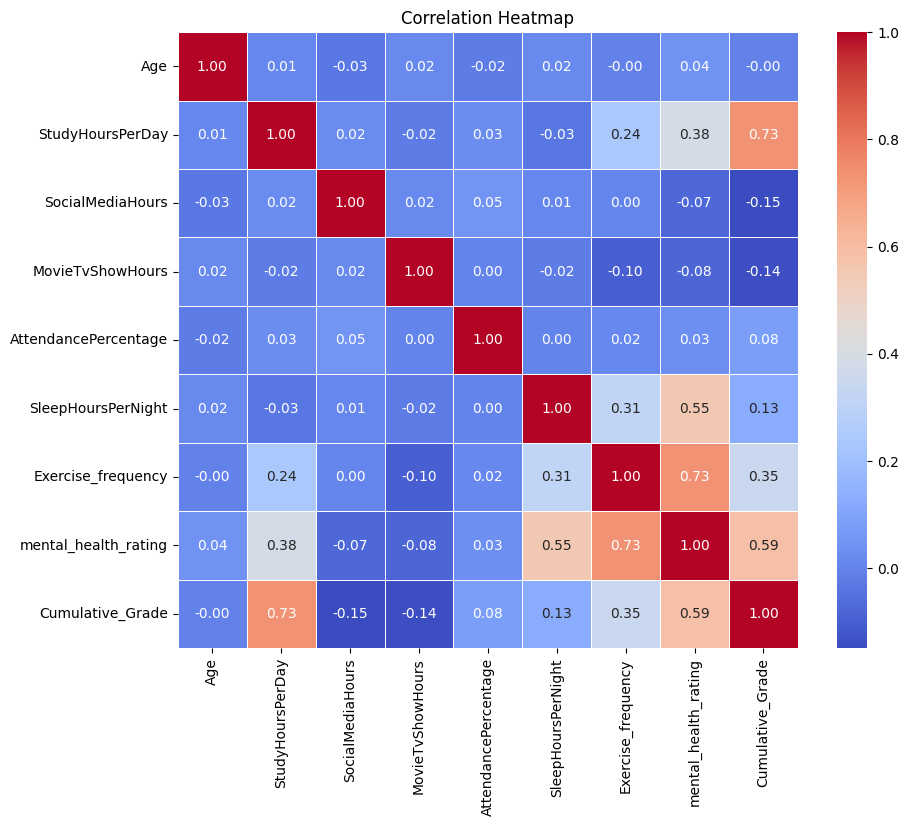

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_data = data.select_dtypes(include='number')
corr_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


Cumulative Grades have strong positive correlation with Mental Health rating and study hours per day. Also a fair amount of positive correlation with exercise frequency. It has negative relation with social media and movie/TV hours.

Now we group data together with respect to grades to smoothen the signal and then plot graph to observe the relation.

<Axes: xlabel='StudyHoursPerDay', ylabel='Cumulative_Grade'>

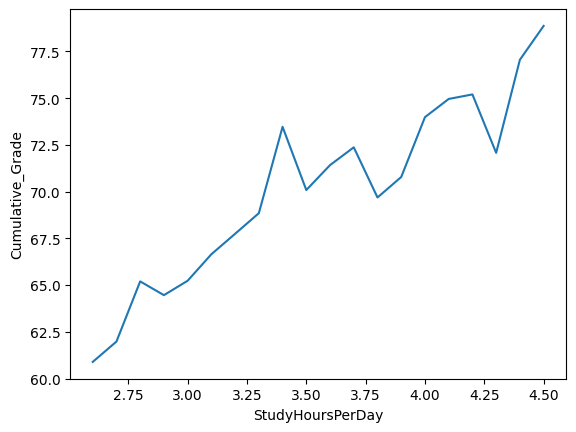

In [11]:

avg = data.groupby('StudyHoursPerDay')['Cumulative_Grade'].mean().reset_index()
sns.lineplot(data=avg, x='StudyHoursPerDay', y='Cumulative_Grade')




Increasing trend with respect to study hours. More study hours= higher grades

<Axes: xlabel='SocialMediaHours', ylabel='Cumulative_Grade'>

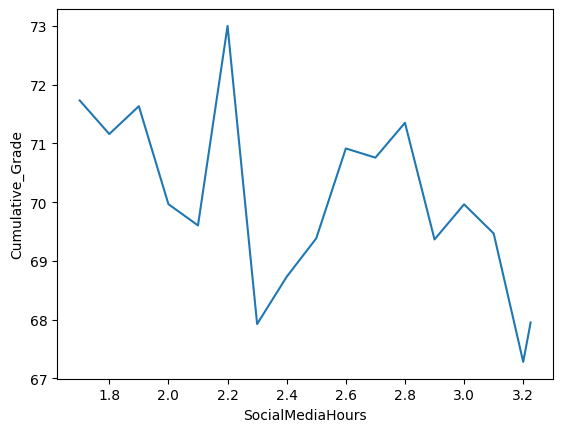

In [12]:
avg = data.groupby('SocialMediaHours')['Cumulative_Grade'].mean().reset_index()
sns.lineplot(data=avg, x='SocialMediaHours', y='Cumulative_Grade')



Negative relation with social media hours and Tv hours

<Axes: xlabel='MovieTvShowHours', ylabel='Cumulative_Grade'>

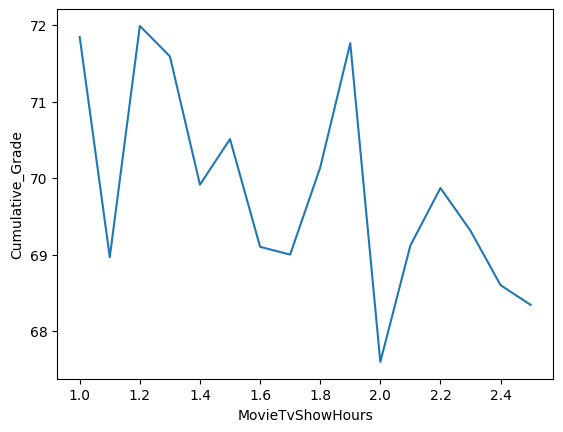

In [13]:
avg = data.groupby('MovieTvShowHours')['Cumulative_Grade'].mean().reset_index()
sns.lineplot(data=avg, x='MovieTvShowHours', y='Cumulative_Grade')



<Axes: xlabel='AttendancePercentage', ylabel='Cumulative_Grade'>

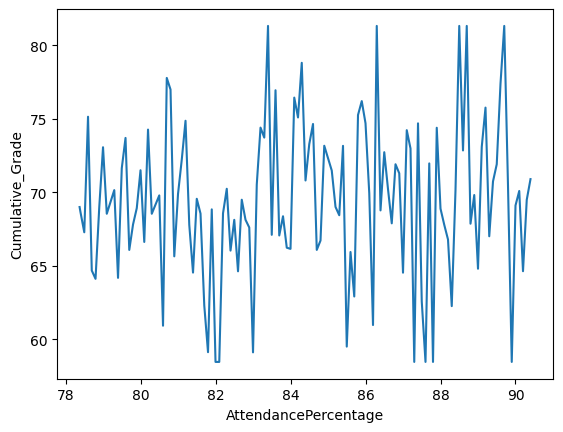

In [14]:
avg = data.groupby('AttendancePercentage')['Cumulative_Grade'].mean().reset_index()
sns.lineplot(data=avg, x='AttendancePercentage', y='Cumulative_Grade')




No certain relation with attendance

<Axes: xlabel='SleepHoursPerNight', ylabel='Cumulative_Grade'>

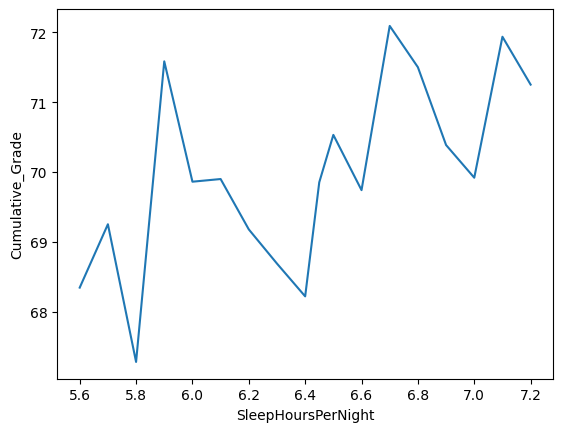

In [15]:

avg = data.groupby('SleepHoursPerNight')['Cumulative_Grade'].mean().reset_index()
sns.lineplot(data=avg, x='SleepHoursPerNight', y='Cumulative_Grade')



Fairly positive relation with sleep hours

<Axes: xlabel='Exercise_frequency', ylabel='Cumulative_Grade'>

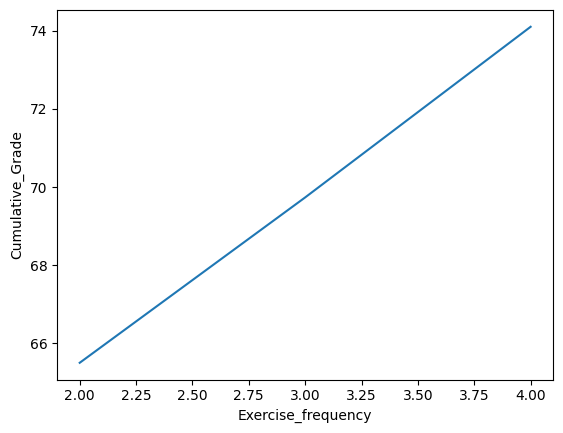

In [16]:
avg = data.groupby('Exercise_frequency')['Cumulative_Grade'].mean().reset_index()
sns.lineplot(data=avg, x='Exercise_frequency', y='Cumulative_Grade')



Directly proportional to exercise frequency

<Axes: xlabel='mental_health_rating', ylabel='Cumulative_Grade'>

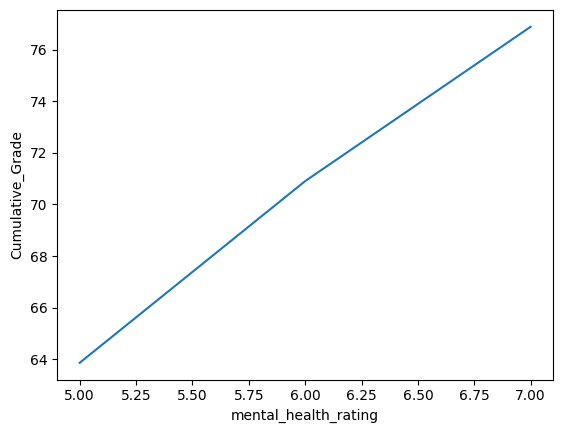

In [17]:

avg = data.groupby('mental_health_rating')['Cumulative_Grade'].mean().reset_index()
sns.lineplot(data=avg, x='mental_health_rating', y='Cumulative_Grade')

Directly proportional to Mental health rating

In [18]:

data_encoded=pd.get_dummies(data,columns = ['Gender', 'PoR','Diet_Quality','parental_education_level','internet_quality','extracurricular_participation'], dtype = int, drop_first=True)

X = data_encoded.drop(['Cumulative_Grade', 'Student_ID'], axis=1)
y=data_encoded['Cumulative_Grade']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

In [20]:
class LinearRegression:
  def __init__(self)->None:
    self.weights: np.ndarray | None=None
    self.bias: np.ndarray | None=None

  def predict(self,X:np.ndarray)->np.ndarray:
    y_pred=np.dot(self.weights,X.T) + self.bias
    return y_pred

  def __loss(self,X:np.ndarray,y:np.ndarray,norm:int)->tuple:

    y_pred=self.predict(X)
    n=X.shape[0]

    errors=np.abs(y_pred-y)**norm
    loss=np.sum(errors)/n

    gradient_base= norm*np.sign(y_pred-y)*(np.abs(y_pred-y)**(norm-1))
    dw = np.dot(X.T, gradient_base) / n
    db = np.sum(gradient_base) / n

    return loss, dw, db

  def fit(self,X:np.ndarray,y:np.ndarray,learning_rate:float=0.01,epochs:int=500,norm: int = 2, threshold: float = 0.0001)->None:

    X = np.asarray(X, dtype=np.float64)
    y = np.asarray(y, dtype=np.float64)

    n_features = X.shape[1]

    self.weights = np.zeros(n_features, dtype=np.float64)
    self.bias = 0.0
    prev_loss = float('inf')

    for epoch in range (epochs):
      curr_loss,dw,db=self.__loss(X, y, norm)
      self.weights-=learning_rate*dw
      self.bias-=learning_rate*db

      if abs(curr_loss-prev_loss)<threshold:
        print(f"Converged at epoch {epoch + 1}. Loss: {curr_loss:.4f}")
        break
      prev_loss=curr_loss




In [23]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

MSE loss:  37.36708469443831


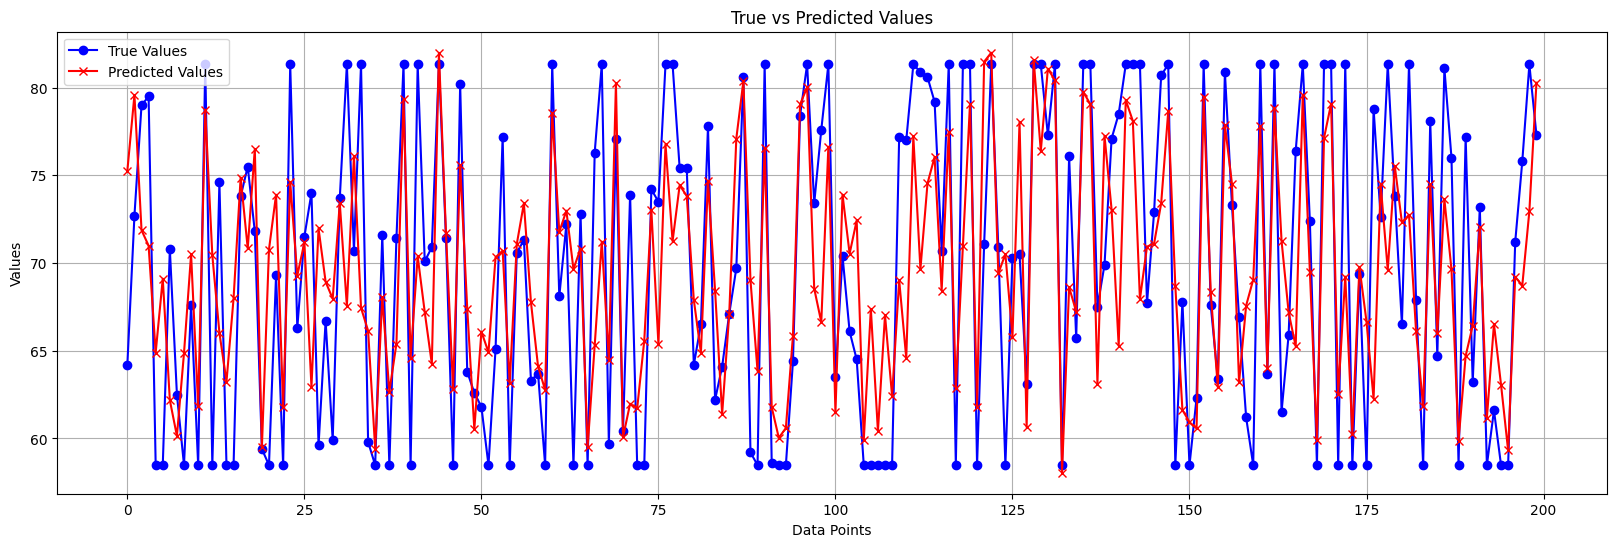

R² Score      : 0.5079
MSE           : 37.3671
RMSE          : 6.1129
MAE           : 4.8794


In [24]:
model = LinearRegression()
model.fit(X_train, y_train, epochs=10000, learning_rate=0.00008, norm=2, threshold=0.0001)
y_pred = model.predict(X_test)

print("MSE loss: ", np.mean((y_pred - y_test) ** 2))

indices = np.arange(len(y_test))
plt.figure(figsize=(20, 6))

plt.plot(indices, y_test, label='True Values', color='blue', marker='o')
plt.plot(indices, y_pred, label='Predicted Values', color='red', marker='x')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs Predicted Values')

plt.legend()
plt.grid(True)
plt.show()


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score      : {r2:.4f}")
print(f"MSE           : {mse:.4f}")
print(f"RMSE          : {rmse:.4f}")
print(f"MAE           : {mae:.4f}")



In [25]:

linear_importance = np.abs(model.weights)

linear_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': linear_importance
}).sort_values(by='Importance', ascending=False)

print(linear_df.head(2))

                Feature  Importance
1      StudyHoursPerDay    4.875120
7  mental_health_rating    3.376735


Top 2 fearures are StudyHoursPerDay and mental_health_rating. As we also saw in the graphs in previous question these 2 had strong positive correlation with the target variable which is cumulative grade hence these 2 are most important feature for predicting the grade.


In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [36]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

class RandomForestRegressor:
    def __init__(self, n_estimators=200, max_depth=None, min_samples_leaf=1, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.trees = []

    def fit(self, X: np.ndarray, y: np.ndarray):
        self.trees = []
        n_samples, n_features = X.shape
        self.max_features = self.max_features or n_features
        for _ in range(self.n_estimators):
            sample_idx = np.random.choice(n_samples, size=n_samples, replace=True)
            X_sample, y_sample = X[sample_idx], y[sample_idx]

            tree_features = np.random.choice(n_features, size=self.max_features, replace=False)
            X_sub = X_sample[:, tree_features]


            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_leaf=self.min_samples_leaf)
            tree.fit(X_sub, y_sample)

            self.trees.append((tree, tree_features))

    def predict(self, X: np.ndarray):
        predictions = []

        for tree, tree_features in self.trees:
            sub_X = X[:, tree_features]
            sub_pred = tree.predict(sub_X)
            predictions.append(sub_pred)

        predictions = np.array(predictions)
        return np.mean(predictions, axis=0)


MSE loss:  35.97977638888888


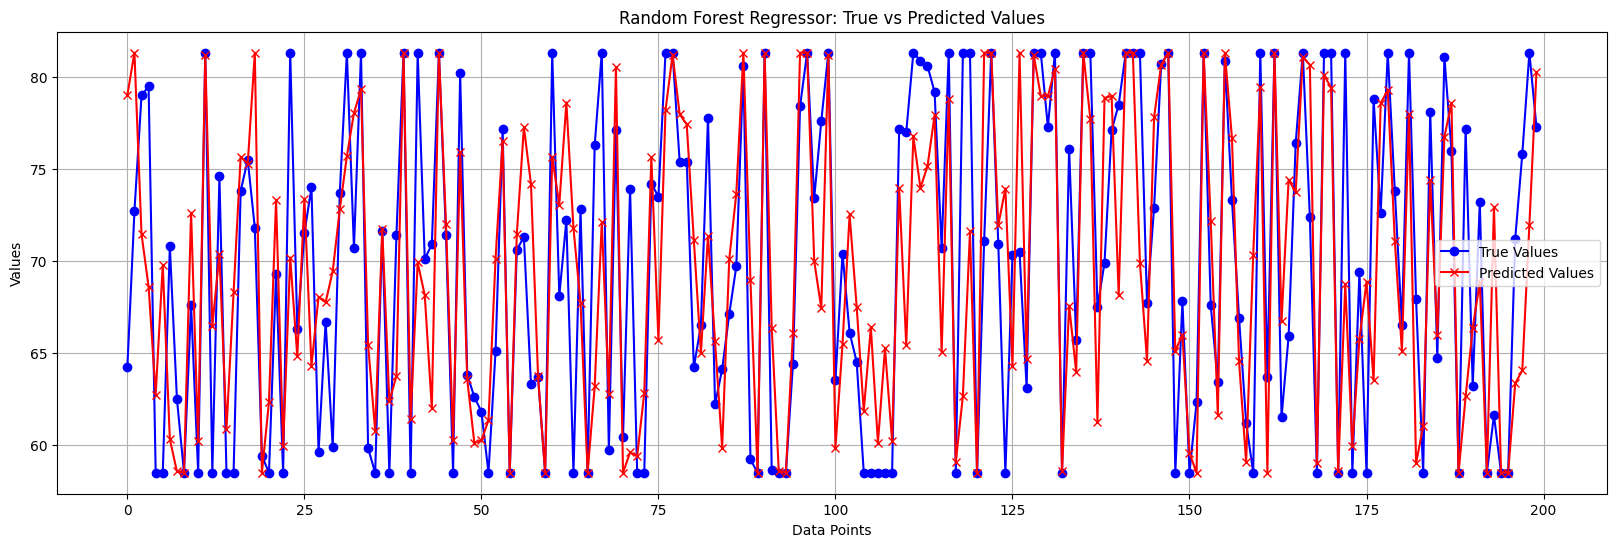

R² Score      : 0.5261
MSE           : 35.9798
RMSE          : 5.9983
MAE           : 4.3948


In [38]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

model = RandomForestRegressor(6)
model.fit(X_train_np, y_train_np)

y_pred = model.predict(X_test_np)

print("MSE loss: ", np.mean((y_pred - y_test_np) ** 2))

indices = np.arange(len(y_test_np))
plt.figure(figsize=(20, 6))

plt.plot(indices, y_test_np, label='True Values', color='blue', marker='o')
plt.plot(indices, y_pred, label='Predicted Values', color='red', marker='x')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Random Forest Regressor: True vs Predicted Values')

plt.legend()
plt.grid(True)
plt.show()




r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score      : {r2:.4f}")
print(f"MSE           : {mse:.4f}")
print(f"RMSE          : {rmse:.4f}")
print(f"MAE           : {mae:.4f}")
